In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 999

## Definitive spelling of parish names comes from 2014 Census

# Data sources:
Unfortuantely the data required exists in multiple location, each with slight differences in naming protocls


## Population:
Data is avaialble from the following site

Source https://www.ubos.org/explore-statistics/20/

Current csv in use 'parish_population_central.csv'

There are separate excel sheets for each region. This notebook only includes 'Central' but other regions can be added to 

Within each sheet there are multiple tabs but only the first relates to population unfiortunately the energe use data qe require is not included, the other tabs were deleted

Finally within the population tab only the Parish (p), Subcounty (s) and Distict (d) population (pop), male headed households(male_hhs), female headed households(fem_hhs) and percentage of female headed hosueholeds (fem_hhs_pc) were included.

## Social statitstics
Social statistics: Data provided by UBOS for the whole country which includes a wide range of features (unftunately not including population) on multiple tabs. this is stored as 'Social Statistics' 

This was manually cleaned with thetabs not relating to pollution removed and then the data relating to cooking, lighting, inside or outside kitchen and waste disposal copied across into one single tab stored as 'social_statistics_pollution_only.csv'

## Shapefile
http://ubos.geo-solutions.it/layers/geonode:uganda_parishes_cleaned_attached/metadata_detail

This shapefile 'uganda_parishes_cleaned_attached.shp' 

provides shapefils for each parish but with some naming differences.

## Roads
Density of minor (T_123) and minor (not_t_123) roads per sq km was obtained using QGIS, running the shapefiles through the road layer and counting total lengt of roads per parish, then dividng through by the area current data stored in 

'kwm_parish_T123_and_not_T123_trim.csv'

Currenlty only for Kamapal, Wakiso, Mukono, See Paul about how to extend this data to whole country using QGIS
## Industry
'census_of_business_establishments_cobe.csv'

This is included in teh file and code that expands it into a useful format s included at the end but there are many differences in naming of parishes

Much of the additional data was stripped manually leaving only Kampala, Wakios and Mukono district. Parish (p), Sub County(s) and District(d). County was not included as there tended to be a lot of variation from one data set to another and we are mainly concerned with parish and using subcounty where names are duplicated. These are included along with total population, total households and the percentage of female households.

## Reading in population data

In [2]:
# read in population data
popn = pd.read_csv('parish_population_central.csv')
popn['hhs'] = popn.fem_hhs + popn.male_hhs
popn = popn[['d', 's', 'p', 'pop', 'hhs', 'fem_hhs_pc']]
popn

,d,s,p,pop,hhs,fem_hhs_pc
0,Kalangala,Bujumba,Bujumba,1970,592,19.1
1,Kalangala,Bujumba,Bunyama,2372,962,16.2
2,Kalangala,Bujumba,Bwendero,3841,1586,19.0
3,Kalangala,Bujumba,Mulabana,3373,1313,21.9
4,Kalangala,Kalangala Town Council,Kalangala A,1270,385,35.8
5,Kalangala,Kalangala Town Council,Kalangala B,3710,1219,27.4
6,Kalangala,Mugoye,Bbeta,5831,1909,24.9
7,Kalangala,Mugoye,Kagulube,3164,1003,23.3
8,Kalangala,Mugoye,Kayunga,3229,899,22.6
9,Kalangala,Bubeke,Bubeke,3829,1518,28.0


In [3]:
# converting characters to upper case for consistency
popn.p = popn.p.str.upper()
popn.s = popn.s.str.upper()
popn.d = popn.d.str.upper()
# Dropping commas in populationa and household data
# popn['pop'] = popn['pop'].str.replace(',', '')
# popn['hhs'] = popn['hhs'].str.replace(',', '')
# Dropping s column as creates problems on merging

In [4]:
#shape of file
popn.shape

(1532, 6)

In [5]:
popn.head()

,d,s,p,pop,hhs,fem_hhs_pc
0,KALANGALA,BUJUMBA,BUJUMBA,1970,592,19.1
1,KALANGALA,BUJUMBA,BUNYAMA,2372,962,16.2
2,KALANGALA,BUJUMBA,BWENDERO,3841,1586,19.0
3,KALANGALA,BUJUMBA,MULABANA,3373,1313,21.9
4,KALANGALA,KALANGALA TOWN COUNCIL,KALANGALA A,1270,385,35.8


In [6]:
# Restricting to only KAMPALA, WAKISO, MUKONO
kwm_popn = popn.loc[(popn.d == 'KAMPALA') | (popn.d == 'WAKISO') | (popn.d == 'MUKONO')]
# size of census file - great its also 323 lines like the population file
kwm_popn.shape

(323, 6)

In [7]:
kwm_popn.head()

,d,s,p,pop,hhs,fem_hhs_pc
17,KAMPALA,CENTRAL DIVISION,BUKESA,9037,2809,37.0
18,KAMPALA,CENTRAL DIVISION,CIVIC CENTRE,375,161,14.9
19,KAMPALA,CENTRAL DIVISION,INDUSTRIAL AREA,645,259,13.9
20,KAMPALA,CENTRAL DIVISION,KAGUGUBE,6229,2608,42.7
21,KAMPALA,CENTRAL DIVISION,KAMWOKYA II,18640,5869,32.5


## Reading in ubos data file

In [8]:
# energy = pd.read_csv('kamp_wak_muk_energy_cleaned.csv')
census = pd.read_csv('social_statistics_pollution_only.csv')

In [9]:
## Creating separate columns for district, county, subcounty and parish based on spacing in original formatting
## Fill down to cover all sub administration contained therein

#Parish
census['p'] = np.nan
census.loc[census['admin'].str.contains('                ', na=True), 'p'] = census['admin']
census.loc[census['admin'].str.contains('                ', na=True), 'admin'] = np.nan

#Subcounty
census.loc[census['admin'].str.contains('            ', na=True), 's'] = census['admin']
census['s'] = census['s'].ffill()
census.loc[census['admin'].str.contains('            ', na=True), 'admin'] = np.nan

# County
census.loc[census['admin'].str.contains('        ', na=True), 'c'] = census['admin']
census['c'] = census['c'].ffill()
census.loc[census['admin'].str.contains('        ', na=True), 'admin'] = np.nan

# District
census.loc[census['admin'].str.contains('    ', na=True), 'd'] = census['admin']
census['d'] = census['d'].ffill()
census.loc[census['admin'].str.contains('    ', na=True), 'admin'] = np.nan

# delete the original admin column
census = census.drop('admin', axis=1)
# Remove any columns that contain nans, these are sub headings/totals
census.dropna(subset=['d', 'c', 's', 'p'], inplace=True)

# Removing spaces used to align columns in original format
census['p'] = census['p'].str.replace('                ', '')
census['s'] = census['s'].str.replace('            ', '')
census['c'] = census['c'].str.replace('        ', '')
census['d'] = census['d'].str.replace('    ', '')

In [10]:
# Restricting to only KAMPALA, WAKISO, MUKONO
kwm_census = census.loc[(census.d == 'KAMPALA') | (census.d == 'WAKISO') | (census.d == 'MUKONO')]
# size of census file - great its also 323 lines like the population file
kwm_census.shape

(323, 49)

In [11]:
kwm_census.head()

,d,c,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,...,dispose_unsupervised_dump,waste_collected,waste_into_water,waste_other,kitch_total,kitch_inside_specific,kitch_inside_not_specific,kitch_outside_built,kitch_make_shift,kitch_open_space
30,KAMPALA,KCCA,CENTRAL DIVISION,BUKESA,2809,2526,23,7,0,2,...,60,1072,12,3,2809,672,542,243,71,1281
31,KAMPALA,KCCA,CENTRAL DIVISION,CIVIC CENTRE,161,155,0,0,0,0,...,53,4,0,0,161,120,20,6,4,11
32,KAMPALA,KCCA,CENTRAL DIVISION,INDUSTRIAL AREA,259,101,5,0,0,0,...,77,19,34,1,259,89,106,7,12,45
33,KAMPALA,KCCA,CENTRAL DIVISION,KAGUGUBE,2608,2265,50,15,3,9,...,189,561,1,3,2608,536,758,210,70,1034
34,KAMPALA,KCCA,CENTRAL DIVISION,KAMWOKYA II,5869,4720,49,17,2,3,...,389,712,27,99,5869,701,1027,591,319,3231


# Dealing with differences in names in Kampala, Wakiso, Mukono only now

In [12]:
# generate a list of all parish names in the population df and all parish names in the census df and then generate differences

# List of parish names - per popn file
popn_parish = kwm_popn.p.tolist()
popn_parish.sort()
# print(popn_parish)

# list of parish names in census
census_parish = kwm_census.p.tolist()
census_parish.sort()
# print(census_parish)

# Difference between two lists
# Koome Island missing from definitive but in the energy list
differences = set(census_parish).symmetric_difference(set(popn_parish))
differences

#Empty set indicates there are no differences in names between parishes in this group

set()

In [13]:
# Searcing parishes in census data for interests sake
kwm_census.loc[kwm_census.p.str.contains('KYENGE')]

,d,c,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,...,dispose_unsupervised_dump,waste_collected,waste_into_water,waste_other,kitch_total,kitch_inside_specific,kitch_inside_not_specific,kitch_outside_built,kitch_make_shift,kitch_open_space
981,WAKISO,BUSIRO,MASULIITA,KYENGEZA,663,15,58,8,4,0,...,12,0,0,3,663,4,3,373,138,145
1016,WAKISO,BUSIRO,KYENGERA TOWN COUNCIL,KYENGERA TOWN BOARD,9355,7357,103,40,0,10,...,689,1907,202,40,9355,1263,679,3486,446,3481


In [14]:
# Searching parishes in popn data for interests sake
kwm_popn.loc[kwm_popn.p.str.contains('KYENGE')]

,d,s,p,pop,hhs,fem_hhs_pc
814,WAKISO,MASULIITA,KYENGEZA,2803,663,30.6
844,WAKISO,KYENGERA TOWN COUNCIL,KYENGERA TOWN BOARD,37891,9355,25.3


In [15]:
# Now looking for differences between sub county names between the two lists
# list of definitive sub county names as per popn file
popn_subcounty = kwm_popn.s.tolist()
popn_subcounty.sort()

# list of energy sub county names
census_subcounty = kwm_census.s.tolist()
census_subcounty.sort()

# Difference between two lists
differences_subcounty = set(popn_subcounty).symmetric_difference(set(census_subcounty))
differences_subcounty

{'KATABI  TOWN COUNCIL', 'KATABI TOWN COUNCIL'}

In [16]:
# Searcing parishes in census data
kwm_census.loc[kwm_census.s.str.contains('BUN')]

,d,c,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,...,dispose_unsupervised_dump,waste_collected,waste_into_water,waste_other,kitch_total,kitch_inside_specific,kitch_inside_not_specific,kitch_outside_built,kitch_make_shift,kitch_open_space
1078,WAKISO,MAKINDYE SSABAGABO MUNICIPALITY,BUNAMWAYA DIVISION,BUNAMWAYA,8293,6778,118,30,0,3,...,344,2136,32,82,8293,1745,958,2521,243,2826
1079,WAKISO,MAKINDYE SSABAGABO MUNICIPALITY,BUNAMWAYA DIVISION,MUTUNDWE,10132,7216,215,84,13,12,...,427,1621,98,66,10132,1411,1353,2978,219,4171


In [17]:
# Searching parishes in popn data
popn.loc[popn.s.str.contains('BUN')]

,d,s,p,pop,hhs,fem_hhs_pc
892,WAKISO,BUNAMWAYA DIVISION,BUNAMWAYA,32549,8293,29.4
893,WAKISO,BUNAMWAYA DIVISION,MUTUNDWE,39984,10132,24.1


In [18]:
# Function for changing name in population to fit with census
def name_change_in_census_parish (incorrect,correct):
    kwm_census.loc[kwm_census.p == incorrect, 'p'] = correct
    
    # Function for changing name in population to fit with census
def name_change_in_popn_subcounty (incorrect,correct):
    popn.loc[popn.s == incorrect, 's'] = correct
    
# Function for changing name in population to fit with census
def name_change_in_census_subcounty (incorrect,correct):
    kwm_census.loc[kwm_census.s == incorrect, 's'] = correct

In [19]:
# Changing parish names in census dataframe
name_change_in_census_parish('NANKULABYE I','NANKULABYE')
name_change_in_census_parish('NANTABULIRIRWA','NANTABULIRWA')
# name_change_in_census_parish('KYENGERA TOWN BOARD','KYENGERA')

# Changing sub county names in popn database to match census
name_change_in_popn_subcounty('BUNAMWAYA','BUNAMWAYA DIVISION')
name_change_in_popn_subcounty('BUSUKUMA','BUSUKUMA DIVISION')
name_change_in_popn_subcounty('BWEYOGERERE','BWEYOGERERE DIVISION')
name_change_in_popn_subcounty('CENTRAL','CENTRAL DIVISION')
name_change_in_popn_subcounty('GOMA','GOMA DIVISION')
name_change_in_popn_subcounty('GOMBE','GOMBE DIVISION')
name_change_in_popn_subcounty('KAJJANSI','KAJJANSI TOWN COUNCIL')
name_change_in_popn_subcounty('KASANGATI','KASANGATI TOWN COUNCIL')
name_change_in_popn_subcounty('KATABI', 'KATABI TOWN COUNCIL')
name_change_in_popn_subcounty('KAWEMPE','KAWEMPE DIVISION')
name_change_in_popn_subcounty('KIRA','KIRA DIVISION')
name_change_in_popn_subcounty('KYENGERA','KYENGERA TOWN COUNCIL')
name_change_in_popn_subcounty('MAKINDYE', 'MAKINDYE DIVISION')
name_change_in_popn_subcounty('MASAJJA','MASAJJA DIVISION')
name_change_in_popn_subcounty('NABWERU','NABWERU DIVISION')
name_change_in_popn_subcounty('NAKAWA','NAKAWA DIVISION')
name_change_in_popn_subcounty('NAMUGONGO','NAMUGONGO DIVISION')
name_change_in_popn_subcounty('NANSANA','NANSANA DIVISION')
name_change_in_popn_subcounty('RUBAGA','RUBAGA DIVISION')
name_change_in_popn_subcounty('NDEJJE','NDEJJE DIVISION')

# Adding sub counties split into town councils
popn.loc[popn.p.isin(['KYAMPISI', 'KYANUUNA', 'LUGUZI', 'LUTISSI']), 's'] = 'NAMAYUMBA TOWN COUNCIL'
popn.loc[popn.p.isin(['GOMBE', 'KASENGEJJE', 'KAVUMBA', 'KISIMBIRI', 'MPUNGA', 'NALUVULE', 'NAMUSERA']), 's'] = 'WAKISO TOWN COUNCIL'
popn.loc[popn.p.isin(['BUKALANGO', 'BUSUJJA', 'KAKIRI', 'KIKUBAMPANGA', 'LUGEYE', 'NAKYELONGOOSA']), 's'] = 'KAKIRI TOWN COUNCIL'
popn.loc[popn.p.isin(['KABALE', 'KANZIZE', 'KAKIRI', 'KATIKAMU', 'LUGUNGUDDE', 'MASULITA']), 's'] = 'MASULITA TOWN COUNCIL'

# Changing sub county names in popn database
name_change_in_census_subcounty('KATABI  TOWN COUNCIL','KATABI TOWN COUNCIL')

C:\Users\Paul\Anaconda3_2\envs\geo_env\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Combining two data files on parish, sub region and district

In [20]:
# Merging census and population files
kwm_popn_census = pd.merge(kwm_census, kwm_popn,  how='left', left_on=['p','s', 'd'], right_on = ['p','s','d'])

In [21]:
kwm_popn_census

,d,c,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,...,waste_other,kitch_total,kitch_inside_specific,kitch_inside_not_specific,kitch_outside_built,kitch_make_shift,kitch_open_space,pop,hhs,fem_hhs_pc
0,KAMPALA,KCCA,CENTRAL DIVISION,BUKESA,2809,2526,23,7,0,2,...,3,2809,672,542,243,71,1281,9037.0,2809.0,37.0
1,KAMPALA,KCCA,CENTRAL DIVISION,CIVIC CENTRE,161,155,0,0,0,0,...,0,161,120,20,6,4,11,375.0,161.0,14.9
2,KAMPALA,KCCA,CENTRAL DIVISION,INDUSTRIAL AREA,259,101,5,0,0,0,...,1,259,89,106,7,12,45,645.0,259.0,13.9
3,KAMPALA,KCCA,CENTRAL DIVISION,KAGUGUBE,2608,2265,50,15,3,9,...,3,2608,536,758,210,70,1034,6229.0,2608.0,42.7
4,KAMPALA,KCCA,CENTRAL DIVISION,KAMWOKYA II,5869,4720,49,17,2,3,...,99,5869,701,1027,591,319,3231,18640.0,5869.0,32.5
5,KAMPALA,KCCA,CENTRAL DIVISION,KAMWOKYA I,536,515,12,0,0,1,...,0,536,353,118,30,0,35,1901.0,536.0,20.5
6,KAMPALA,KCCA,CENTRAL DIVISION,KISENYI I,326,312,0,1,0,0,...,0,326,66,62,80,6,112,1120.0,326.0,33.1
7,KAMPALA,KCCA,CENTRAL DIVISION,KISENYI II,2107,1823,1,11,0,0,...,132,2107,385,320,304,128,970,8329.0,2107.0,40.9
8,KAMPALA,KCCA,CENTRAL DIVISION,KISENYI III,1216,1005,4,10,0,1,...,2,1216,96,210,87,107,716,4559.0,1216.0,33.3
9,KAMPALA,KCCA,CENTRAL DIVISION,KOLOLO I,248,236,3,0,0,0,...,1,248,179,24,16,2,27,991.0,248.0,25.0


In [22]:
# Great still 323 lines so these match well
kwm_popn_census.shape

(323, 52)

In [23]:
kwm_popn_census.loc[kwm_popn_census.p.str.contains('KYENGE')]

,d,c,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,...,waste_other,kitch_total,kitch_inside_specific,kitch_inside_not_specific,kitch_outside_built,kitch_make_shift,kitch_open_space,pop,hhs,fem_hhs_pc
208,WAKISO,BUSIRO,MASULIITA,KYENGEZA,663,15,58,8,4,0,...,3,663,4,3,373,138,145,2803.0,663.0,30.6
238,WAKISO,BUSIRO,KYENGERA TOWN COUNCIL,KYENGERA TOWN BOARD,9355,7357,103,40,0,10,...,40,9355,1263,679,3486,446,3481,37891.0,9355.0,25.3


## Reading in shapefiles

In [24]:
# reading in shapefiles
# http://ubos.geo-solutions.it/layers/geonode:uganda_parishes_cleaned_attached/metadata_detail
parish = gpd.read_file('uganda_parishes_cleaned_attached.shp')

In [25]:
parish.shape

(7435, 12)

In [26]:
parish.columns

Index(['F15Regions', 'DName2016', 'CName2016', 'SName2016', 'scode',
       'costituenc', 'd', 'c', 's', 'p', 'pc2016', 'geometry'],
      dtype='object')

In [27]:
parish.head()

,F15Regions,DName2016,CName2016,SName2016,scode,costituenc,d,c,s,p,pc2016,geometry
0,ANKOLE,SHEEMA,SHEEMA,KYANGYENYI,426105,SHEEMA COUNTY NORTH,SHEEMA,SHEEMA,KYANGYENYI,MUZIRA,42610504,"(POLYGON ((206844.2516999999 9942954.0886, 206..."
1,KIGEZI,RUKUNGIRI,RUJUMBURA,RUHINDA,412205,RUJUMBURA COUNTY,RUKUNGIRI,BUJUMBURA,RUHINDA,NDERE,41220503,"POLYGON ((159388.8587000007 9924098.7107, 1593..."
2,ANKOLE,SHEEMA,SHEEMA,BUGONGI TOWN COUNCIL,426101,SHEEMA COUNTY SOUTH,SHEEMA,SHEEMA,RUGARAMA,RUGARAMA,42610704,"POLYGON ((195807.0455700019 9921996.679199999,..."
3,ANKOLE,SHEEMA,SHEEMA,KIGARAMA,426103,SHEEMA COUNTY NORTH,SHEEMA,SHEEMA,KIGARAMA,BWEYAGAMBA,42610301,"POLYGON ((213691.5119000012 9943638.6711, 2138..."
4,ANKOLE,SHEEMA,SHEEMA,KITAGATA,426104,SHEEMA COUNTY SOUTH,SHEEMA,SHEEMA,KITAGATA,KASHEKURO,42610401,"POLYGON ((189392.2689000005 9927217.547100002,..."


In [28]:
# removing unecessary columns ie 2016 regions, leaving 2010 as should coincide with census
parish.drop(['F15Regions', 'DName2016', 'CName2016', 'SName2016', 'scode',
       'costituenc', 'pc2016'], axis=1, inplace=True)

In [29]:
# remaining columns
parish.columns

Index(['d', 'c', 's', 'p', 'geometry'], dtype='object')

In [30]:
parish.loc[parish.p.str.contains('KOOME')]

,d,c,s,p,geometry
894,GOMBA,GOMBA,KANONI TOWN COUNCIL,KOOME,"POLYGON ((379304.515300001 10022307.0792, 3788..."


In [31]:
# First set geometry to lat long
parish= parish.to_crs({'init': 'epsg:4326'})
print(parish.crs)

{'init': 'epsg:4326'}


In [32]:
# Create POINT centroid column based on lat and long
parish['centroid'] = parish['geometry'].centroid

In [33]:
# creat lat and long column from centroid
parish['long'] = parish.centroid.x
parish['lat'] = parish.centroid.y

In [34]:
# Confirm existing crs is in lat long form ie degrees (epsg:4326)
print(parish.crs)

{'init': 'epsg:4326'}


In [35]:
# Create a copy and convert to epsg:21095 mapping for Uganda area in metres
parish= parish.to_crs({'init': 'epsg:21095'})
print(parish.crs)

{'init': 'epsg:21095'}


In [36]:
# Now generate area in sqkm
parish["km2"] = parish['geometry'].area/ 10**6

In [37]:
# And finally return geometry to lat long
parish= parish.to_crs({'init': 'epsg:4326'})
print(parish.crs)

{'init': 'epsg:4326'}


# Restricting shapefiles to  Kampala Wakiso and  Mukono

In [38]:
# restricting shapefules to k w or m
kwm_shape = parish.loc[(parish.d == 'KAMPALA') | (parish.d == 'WAKISO') | (parish.d == 'MUKONO')].reset_index(drop=True)

In [39]:
# INtroducing roads data minor and major roads

In [40]:
roads = pd.read_csv('kwm_parish_T123_and_not_T123_trim.csv')
roads.area = roads.area/1000000
roads.perimeter = roads.perimeter / 1000
roads.T123 = roads.T123 / 1000
roads.not_T123 = roads.not_T123 / 1000
roads

,d,s,p,area,perimeter,T123,not_T123
0,WAKISO,GOMBE DIVISION,BUWAMBO,17.377778,23.250047,53.053595,28.925947
1,WAKISO,NABWERU DIVISION,MAGANJO,7.297543,11.601325,102.736154,76.192390
2,WAKISO,KASANGATI TOWN COUNCIL,WATTUBA,21.066337,27.971196,188.114279,144.310833
3,WAKISO,NDEJJE DIVISION,MUTUNGO,27.787537,27.267336,186.317151,143.511726
4,WAKISO,DIVISION A,CENTRAL WARD,26.086071,32.292368,103.272543,85.670222
5,WAKISO,DIVISION B,KIGUNGU WARD,203.945912,64.199275,84.408907,72.950925
6,WAKISO,KAKIRI,LUBBE,10.316663,13.575814,27.385855,27.385855
7,WAKISO,KAKIRI TOWN COUNCIL,LUGEYE WARD,3.555610,10.281291,12.854430,12.854430
8,WAKISO,KASANJE,JJUNGO,33.188957,25.713950,75.099542,67.112210
9,MUKONO,NAKISUNGA,NAMAIBA,35.701310,36.386986,63.956134,50.340990


In [41]:
# List of shapefile names compared with road parish names
shape_parish = kwm_shape.p.tolist()
shape_parish.sort()

# list of parish names in energy
roads_parish = roads.p.tolist()
roads_parish.sort()

# Difference between two lists
# Koome Island missing from definitive but in the energy list
differences = set(shape_parish).symmetric_difference(set(roads_parish))
differences

['BAKKA', 'BALABALA', 'BAMUSUUTA', 'BANDA', 'BANDA', 'BBALE-MUKWENDA', 'BBEMBE', 'BUDDO', 'BUGOLOBI', 'BUGOMBE', 'BUGOYE', 'BUKALANGO WARD', 'BUKASA', 'BUKASA', 'BUKASA', 'BUKEREERE WARD', 'BUKESA', 'BUKONDO', 'BUKOTO I', 'BUKOTO II', 'BULAMU', 'BULIJJO', 'BULIKA', 'BULOBA', 'BULUMBU', 'BULWANYI', 'BUNAKIJJA', 'BUNAMWAYA', 'BUSABALA', 'BUSANGA', 'BUSEGA', 'BUSSI', 'BUSUJJA WARD', 'BUSUKUMA', 'BUTABIKA', 'BUWAMBO', 'BUWANUKA', 'BUZIGA', 'BWAISE I', 'BWAISE II', 'BWAISE III', 'BWEYA', 'BWEYOGERERE', 'CENTRAL WARD', 'CIVIC CENTER', 'DDUNDU', 'GAYAZA', 'GGABA', 'GGULU WARD', 'GGULUDDENE', 'GOMBE', 'GOMBE WARD', 'GULWE', 'INDUSTRIAL AREA', 'ITEK', 'JJUNGO', 'KABALAGALA', 'KABALE', 'KABALE', 'KABANGA', 'KABEMBE', 'KABIMBIRI', 'KABOWA', 'KABUBBU', 'KABUMBA', 'KAGUGUBE', 'KAKIRI WARD', 'KAKUKUULU', 'KALIITI', 'KAMULI', 'KAMWOKYA I', 'KAMWOKYA II', 'KANSANGA-MUYENGA', 'KANYANYA', 'KANZIRO', 'KANZIZE', 'KASANA', 'KASANJE', 'KASENGE', 'KASENGE', 'KASENGEJJE', 'KASUBI', 'KATABI WARD', 'KATADDE', '

{'KYENGERA'}

In [42]:
# List of shapefile subcounty names
shape_sc = kwm_shape.s.tolist()
shape_sc.sort()

# list of parish names in roads
roads_sc = roads.s.tolist()
roads_sc.sort()

# Difference between two lists
# Koome Island missing from definitive but in the energy list
differences = set(shape_sc).symmetric_difference(set(roads_sc))
differences

set()

# Merging shape file and road file

In [43]:
kwm_shape = pd.merge(kwm_shape, roads,  how='left', left_on=['p','s','d'], right_on = ['p','s','d'])

In [44]:
kwm_shape.head()

,d,c,s,p,geometry,centroid,long,lat,km2,area,perimeter,T123,not_T123
0,WAKISO,NANSANA MUNICIPALITY,GOMBE DIVISION,BUWAMBO,POLYGON ((32.53143368832828 0.4762466645839938...,POINT (32.54113958705982 0.5135082789258171),32.541140,0.513508,17.527065,17.377778,23.250047,53.053595,28.925947
1,WAKISO,NANSANA MUNICIPALITY,NABWERU DIVISION,MAGANJO,POLYGON ((32.54779283311401 0.3775081363479638...,POINT (32.55006809720009 0.395034631492538),32.550068,0.395035,7.360461,7.297543,11.601325,102.736154,76.192390
2,WAKISO,KYADONDO,KASANGATI TOWN COUNCIL,WATTUBA,POLYGON ((32.57870179982462 0.4284537726825031...,POINT (32.55570463931124 0.432226804246413),32.555705,0.432227,21.248375,21.066337,27.971196,188.114279,144.310833
3,WAKISO,SSABAGABO-MAKINDYE MUNICIPALITY,NDEJJE DIVISION,MUTUNGO,POLYGON ((32.59285136184297 0.2205596860949147...,POINT (32.58355633895954 0.1987229345166905),32.583556,0.198723,28.030346,27.787537,27.267336,186.317151,143.511726
4,WAKISO,ENTEBBE MUNICIPALITY,DIVISION A,CENTRAL WARD,POLYGON ((32.4912165943717 0.06759216276370834...,POINT (32.47507446162762 0.04052700136635882),32.475074,0.040527,26.304286,26.086071,32.292368,103.272543,85.670222


# Finally checking differences and merging shapefile and census data

In [45]:
# List of parish names per census file
popn_census = kwm_popn_census.p.tolist()
popn_census.sort()

# list of parish names per shapefile
parish_list = kwm_shape.p.tolist()
parish_list.sort()

# Difference between two lists
differences = set(popn_census).symmetric_difference(set(parish_list))
differences

{'BBALE MUKWENDA',
 'BBALE-MUKWENDA',
 'BUKALANGO',
 'BUKALANGO WARD',
 'BUKEREERE WARD',
 'BUKERERE',
 'BUSUJJA',
 'BUSUJJA WARD',
 'CENTRAL',
 'CENTRAL WARD',
 'CIVIC CENTER',
 'CIVIC CENTRE',
 'GGULU',
 'GGULU WARD',
 'GGULUDDENE',
 'GOMBE WARD',
 'GULUDDENE',
 'KAKIRI',
 'KAKIRI WARD',
 'KANSANGA',
 'KANSANGA-MUYENGA',
 'KATABI',
 'KATABI WARD',
 'KATEETE',
 'KATETE',
 'KATIKAMU',
 'KATIKAMU WARD',
 'KAVUMBA',
 'KAVUMBA WARD',
 'KAZO ANGOLA',
 'KAZO WARD',
 'KIGUNGU',
 'KIGUNGU WARD',
 'KIKUBAMPANGA',
 'KIKUBAMPANGA WARD',
 'KISENYI  III',
 'KISENYI III',
 'KISIMBIRI',
 'KISIMBIRI WARD',
 'KISOZI/KITEMU',
 'KITEEZI',
 'KITEMU-KISOZI',
 'KIWAFU WARD',
 'KYABAZAALA',
 'KYABAZALA',
 'KYALIWAJALA',
 'KYALIWAJJALA',
 'KYENGERA',
 'KYENGERA TOWN BOARD',
 'KYENGEZA',
 'LUBAGA',
 'LUGEYE',
 'LUGEYE WARD',
 'MASULITA',
 'MASULITA WARD',
 'MATUGA',
 'MATUGGA',
 'MISINDYE',
 'MISINDYE WARD',
 'MPUNGA',
 'MPUNGA WARD',
 'MWEREERWE',
 'MWERERWE',
 'NABWERU NORTH',
 'NABWERU NORTH WARD',
 'NABWE

In [46]:
# Searching parishes in popn data
kwm_popn_census.loc[kwm_popn_census.p.str.contains('KYENGE')]

,d,c,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,...,waste_other,kitch_total,kitch_inside_specific,kitch_inside_not_specific,kitch_outside_built,kitch_make_shift,kitch_open_space,pop,hhs,fem_hhs_pc
208,WAKISO,BUSIRO,MASULIITA,KYENGEZA,663,15,58,8,4,0,...,3,663,4,3,373,138,145,2803.0,663.0,30.6
238,WAKISO,BUSIRO,KYENGERA TOWN COUNCIL,KYENGERA TOWN BOARD,9355,7357,103,40,0,10,...,40,9355,1263,679,3486,446,3481,37891.0,9355.0,25.3


In [47]:
# Searching parishes in popn data
kwm_shape.loc[kwm_shape.p.str.contains('KYENGE')]

,d,c,s,p,geometry,centroid,long,lat,km2,area,perimeter,T123,not_T123
235,WAKISO,BUSIRO,KYENGERA TOWN COUNCIL,KYENGERA,POLYGON ((32.49392200255924 0.2844968207394963...,POINT (32.50032005623486 0.2985592480739754),32.50032,0.298559,7.197649,NaN,NaN,NaN,NaN


In [48]:
# Function for changing name in shapefile to name in population data
def name_change_parish_shape(incorrect,correct):
    kwm_shape.loc[kwm_shape.p == incorrect, 'p'] = correct
    
# Function for changing name in shapefile to name in population data
def name_change_parish_popn_census(incorrect,correct):
    kwm_popn_census.loc[kwm_popn_census.p == incorrect, 'p'] = correct

In [49]:
# Remove the word ward from the shapefiles
kwm_shape.p = kwm_shape.p.str.replace(' WARD', '')

# changes to shapefiles in traditional way
name_change_parish_shape('BBALE-MUKWENDA','BBALE MUKWENDA')

# Too hard lets do it as a list, at least for the easy ones
# Changing from the first to the second
misspelt_parishes = ['BUKEREERE',
 'BUKERERE',
 'CIVIC CENTER',
 'CIVIC CENTRE',
 'GGULUDDENE',
 'GULUDDENE',
 'KANSANGA',
 'KANSANGA-MUYENGA',
 'KATEETE',
 'KATETE',
#  'KAZO ANGOLA',
 'KISENYI  III',
 'KISENYI III',
 'KISOZI/KITEMU',
#  'KITEEZI',
 'KITEMU-KISOZI',
 'KYABAZAALA',
 'KYABAZALA',
 'KYALIWAJALA',
 'KYALIWAJJALA',
 'KYENGERA',
 'KYENGERA TOWN BOARD',
#  'KYENGEZA',
 'LUBAGA',
 'RUBAGA',
 'MATUGA',
 'MATUGGA',
 'MWEREERWE',
 'MWERERWE',
 'NAJJANANKUBI I',
 'NAJJANANKUMBI I',
 'NAJJANANKUBI II',
 'NAJJANANKUMBI II',
 'NAKAWA INSTITUTE',
 'NAKAWA INSTITUTION',
 'NAKIVUBO SHAURIYAAKO',
 'NAKIVUBO-SHAURIYAKO',
 'NAMAIBA',
 'NAMAYIBA',
 'NAMUMIRA ANTHONY',
 'NAMUMIRA-ANTHONY',
 'NATEETE',
 'NATETE',
#  'NSAMBYA CENTRAL',
 'NTAAWO',
 'NTAWO',
 'OCHENG 7/8',
 'OCHIENG',
 'SEETA NAZIGO',
 'SEETA-NAZIGO',
 'SENTEMA',
 'SSENTEMA',
 'TABA',
 'TTABA',
 'TIKALU',
 'TTIKALU',
 'TTUMBAALI',
 'TUMBAALI',
 'WAGALA',
 'WAGGALA']

In [50]:
# Extract list of incorrectly spelt parishes
incorrectly_spelt_parishes = misspelt_parishes[::2]
incorrectly_spelt_parishes

['BUKEREERE',
 'CIVIC CENTER',
 'GGULUDDENE',
 'KANSANGA',
 'KATEETE',
 'KISENYI  III',
 'KISOZI/KITEMU',
 'KYABAZAALA',
 'KYALIWAJALA',
 'KYENGERA',
 'LUBAGA',
 'MATUGA',
 'MWEREERWE',
 'NAJJANANKUBI I',
 'NAJJANANKUBI II',
 'NAKAWA INSTITUTE',
 'NAKIVUBO SHAURIYAAKO',
 'NAMAIBA',
 'NAMUMIRA ANTHONY',
 'NATEETE',
 'NTAAWO',
 'OCHENG 7/8',
 'SEETA NAZIGO',
 'SENTEMA',
 'TABA',
 'TIKALU',
 'TTUMBAALI',
 'WAGALA']

In [51]:
# Extract list of correctly spelt parishes
correctly_spelt_parishes = misspelt_parishes[1::2]
correctly_spelt_parishes

['BUKERERE',
 'CIVIC CENTRE',
 'GULUDDENE',
 'KANSANGA-MUYENGA',
 'KATETE',
 'KISENYI III',
 'KITEMU-KISOZI',
 'KYABAZALA',
 'KYALIWAJJALA',
 'KYENGERA TOWN BOARD',
 'RUBAGA',
 'MATUGGA',
 'MWERERWE',
 'NAJJANANKUMBI I',
 'NAJJANANKUMBI II',
 'NAKAWA INSTITUTION',
 'NAKIVUBO-SHAURIYAKO',
 'NAMAYIBA',
 'NAMUMIRA-ANTHONY',
 'NATETE',
 'NTAWO',
 'OCHIENG',
 'SEETA-NAZIGO',
 'SSENTEMA',
 'TTABA',
 'TTIKALU',
 'TUMBAALI',
 'WAGGALA']

In [52]:
# creating a dict of misspelt and correctly spelt
parish_renamer = dict(zip(incorrectly_spelt_parishes, correctly_spelt_parishes))
parish_renamer

{'BUKEREERE': 'BUKERERE',
 'CIVIC CENTER': 'CIVIC CENTRE',
 'GGULUDDENE': 'GULUDDENE',
 'KANSANGA': 'KANSANGA-MUYENGA',
 'KATEETE': 'KATETE',
 'KISENYI  III': 'KISENYI III',
 'KISOZI/KITEMU': 'KITEMU-KISOZI',
 'KYABAZAALA': 'KYABAZALA',
 'KYALIWAJALA': 'KYALIWAJJALA',
 'KYENGERA': 'KYENGERA TOWN BOARD',
 'LUBAGA': 'RUBAGA',
 'MATUGA': 'MATUGGA',
 'MWEREERWE': 'MWERERWE',
 'NAJJANANKUBI I': 'NAJJANANKUMBI I',
 'NAJJANANKUBI II': 'NAJJANANKUMBI II',
 'NAKAWA INSTITUTE': 'NAKAWA INSTITUTION',
 'NAKIVUBO SHAURIYAAKO': 'NAKIVUBO-SHAURIYAKO',
 'NAMAIBA': 'NAMAYIBA',
 'NAMUMIRA ANTHONY': 'NAMUMIRA-ANTHONY',
 'NATEETE': 'NATETE',
 'NTAAWO': 'NTAWO',
 'OCHENG 7/8': 'OCHIENG',
 'SEETA NAZIGO': 'SEETA-NAZIGO',
 'SENTEMA': 'SSENTEMA',
 'TABA': 'TTABA',
 'TIKALU': 'TTIKALU',
 'TTUMBAALI': 'TUMBAALI',
 'WAGALA': 'WAGGALA'}

In [53]:
# replacing misspelt parish name with correct parish name
kwm_shape['p'] = kwm_shape['p'].replace(parish_renamer)

In [54]:
# List of parish names - per popn census file
popn_census = kwm_popn_census.p.tolist()
popn_census.sort()

# list of parish names in shapes
parish_list = kwm_shape.p.tolist()
parish_list.sort()

# Difference between two lists
# Koome Island missing from definitive but in the energy list
differences = set(popn_census).symmetric_difference(set(parish_list))
differences

{'KANSANGA',
 'KANSANGA-MUYENGA',
 'KATEETE',
 'KATETE',
 'KAZO ANGOLA',
 'KITEEZI',
 'KYABAZAALA',
 'KYABAZALA',
 'KYENGEZA',
 'LUBAGA',
 'MWEREERWE',
 'MWERERWE',
 'NAKAWA INSTITUTE',
 'NAKAWA INSTITUTION',
 'NAKIVUBO SHAURIYAAKO',
 'NAKIVUBO-SHAURIYAKO',
 'NAMUMIRA ANTHONY',
 'NAMUMIRA-ANTHONY',
 'NATEETE',
 'NATETE',
 'NSAMBYA CENTRAL',
 'NTAAWO',
 'NTAWO',
 'RUBAGA',
 'SEETA NAZIGO',
 'SEETA-NAZIGO',
 'SENTEMA',
 'SSENTEMA',
 'TIKALU',
 'TTIKALU'}

In [55]:
different_spellings2 = ['KANSANGA',
 'KANSANGA-MUYENGA',
 'KATEETE',
 'KATETE',
#  'KAZO ANGOLA',
#  'KITEEZI',
 'KYABAZAALA',
 'KYABAZALA',
#  'KYENGEZA',
 'LUBAGA',
 'RUBAGA',
 'MWEREERWE',
 'MWERERWE',
 'NAKAWA INSTITUTE',
 'NAKAWA INSTITUTION',
 'NAKIVUBO SHAURIYAAKO',
 'NAKIVUBO-SHAURIYAKO',
 'NAMUMIRA ANTHONY',
 'NAMUMIRA-ANTHONY',
 'NATEETE',
 'NATETE',
#  'NSAMBYA CENTRAL',
 'NTAAWO',
 'NTAWO',
 'SEETA NAZIGO',
 'SEETA-NAZIGO',
 'SENTEMA',
 'SSENTEMA',
 'TIKALU',
 'TTIKALU']

In [56]:
correctly_spelt_parishes2 = different_spellings2[::2]
correctly_spelt_parishes2

['KANSANGA',
 'KATEETE',
 'KYABAZAALA',
 'LUBAGA',
 'MWEREERWE',
 'NAKAWA INSTITUTE',
 'NAKIVUBO SHAURIYAAKO',
 'NAMUMIRA ANTHONY',
 'NATEETE',
 'NTAAWO',
 'SEETA NAZIGO',
 'SENTEMA',
 'TIKALU']

In [57]:
incorrectly_spelt_parishes2 = different_spellings2[1::2]
incorrectly_spelt_parishes2

['KANSANGA-MUYENGA',
 'KATETE',
 'KYABAZALA',
 'RUBAGA',
 'MWERERWE',
 'NAKAWA INSTITUTION',
 'NAKIVUBO-SHAURIYAKO',
 'NAMUMIRA-ANTHONY',
 'NATETE',
 'NTAWO',
 'SEETA-NAZIGO',
 'SSENTEMA',
 'TTIKALU']

In [58]:
parish_renamer2 = dict(zip(incorrectly_spelt_parishes2, correctly_spelt_parishes2))
parish_renamer2

{'KANSANGA-MUYENGA': 'KANSANGA',
 'KATETE': 'KATEETE',
 'KYABAZALA': 'KYABAZAALA',
 'RUBAGA': 'LUBAGA',
 'MWERERWE': 'MWEREERWE',
 'NAKAWA INSTITUTION': 'NAKAWA INSTITUTE',
 'NAKIVUBO-SHAURIYAKO': 'NAKIVUBO SHAURIYAAKO',
 'NAMUMIRA-ANTHONY': 'NAMUMIRA ANTHONY',
 'NATETE': 'NATEETE',
 'NTAWO': 'NTAAWO',
 'SEETA-NAZIGO': 'SEETA NAZIGO',
 'SSENTEMA': 'SENTEMA',
 'TTIKALU': 'TIKALU'}

In [59]:
kwm_shape['p'] = kwm_shape['p'].replace(parish_renamer2)

In [60]:
# List of definitive names - per census
popn_census = kwm_popn_census.p.tolist()
popn_census.sort()

# list of parish names in shapefile
parish_list = kwm_shape.p.tolist()
parish_list.sort()

# Difference between two lists
# Koome Island missing from definitive but in the energy list
differences = set(popn_census).symmetric_difference(set(parish_list))
differences

{'KAZO ANGOLA', 'KITEEZI', 'KYENGEZA', 'NSAMBYA CENTRAL'}

In [ ]:
# Remaining differences not resolved

# popn_census and shapefiels, subcounties

In [61]:
# List of definitive sub county names 
sc_popn_census = kwm_popn_census.s.tolist()
sc_popn_census.sort()

# list of sub county names shape
sc_list = kwm_shape.s.tolist()
sc_list.sort()

# Difference between two lists
differences = set(sc_popn_census).symmetric_difference(set(sc_list))
differences

{'CENTRAL',
 'KAWEMPE',
 'KAWEMPE DIVISION',
 'KOOME',
 'KOOME ISLAND',
 'MAKINDYE',
 'MAKINDYE DIVISION',
 'MASULIITA',
 'MASULITA',
 'NAKAWA',
 'NAKAWA DIVISION',
 'RUBAGA',
 'RUBAGA DIVISION'}

In [62]:
# Searching parishes in popn data
kwm_popn_census.loc[kwm_popn_census.s.str.contains('KOOME')]

,d,c,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,...,waste_other,kitch_total,kitch_inside_specific,kitch_inside_not_specific,kitch_outside_built,kitch_make_shift,kitch_open_space,pop,hhs,fem_hhs_pc
96,MUKONO,MUKONO,KOOME ISLAND,BUGOMBE,648,2,87,14,0,1,...,2,648,35,80,154,34,345,2148.0,648.0,21.5
97,MUKONO,MUKONO,KOOME ISLAND,BUSANGA,2533,4,139,72,16,0,...,134,2533,157,747,213,57,1359,6735.0,2533.0,25.8
98,MUKONO,MUKONO,KOOME ISLAND,LWOMOLO,1457,5,75,4,0,0,...,130,1457,144,264,299,132,618,3832.0,1457.0,23.5
99,MUKONO,MUKONO,KOOME ISLAND,MUBEMBE,2141,5,97,13,2,0,...,130,2141,94,428,437,125,1057,6063.0,2141.0,20.8


In [63]:
# Searching parishes in popn data
kwm_shape.loc[kwm_shape.s.str.contains('KOOME')]

,d,c,s,p,geometry,centroid,long,lat,km2,area,perimeter,T123,not_T123
41,MUKONO,MUKONO,KOOME,LWOMOLO,POLYGON ((32.72190480861882 -0.151817986416405...,POINT (32.81348797577696 -0.5226848949330727),32.813488,-0.522685,1479.735786,1465.763815,244.527370,25.054417,25.054417
178,MUKONO,MUKONO,KOOME,MUBEMBE,POLYGON ((32.87559983768252 -0.020798736836158...,POINT (32.79415991570885 0.009328004379848563),32.794160,0.009328,172.468910,170.847420,53.550825,41.649631,41.649631
179,MUKONO,MUKONO,KOOME,BUSANGA,POLYGON ((32.74964203204577 -0.096969550413800...,POINT (32.62567714659193 -0.1055367869039255),32.625677,-0.105537,225.756909,223.768857,69.070346,32.296583,32.296583
180,MUKONO,MUKONO,KOOME,BUGOMBE,POLYGON ((32.72893919441167 0.0068213530963684...,POINT (32.69143824590356 -0.02024980275904204),32.691438,-0.020250,195.019669,193.258818,59.355461,54.252369,54.252369


In [64]:
# Function for changing name in shapefile to name in population data
def name_change_sc_shape(incorrect,correct):
    kwm_shape.loc[kwm_shape.s == incorrect, 's'] = correct

In [65]:
# Changing the shapefile to match the census fo sub county
name_change_sc_shape('KAWEMPE', 'KAWEMPE DIVISION')
name_change_sc_shape('MAKINDYE', 'MAKINDYE DIVISION')
name_change_sc_shape('MASULITA', 'MASULIITA')
name_change_sc_shape('NAKAWA', 'NAKAWA DIVISION')
name_change_sc_shape('RUBAGA', 'RUBAGA DIVISION')
name_change_sc_shape('CENTRAL', 'CENTRAL DIVISION')
name_change_sc_shape('KOOME', 'KOOME ISLAND')

In [66]:
# List of definitive parish names - per popn file
sc_popn_census = kwm_popn_census.s.tolist()
sc_popn_census.sort()

# list of parish names in energy
sc_list = kwm_shape.s.tolist()
sc_list.sort()

# Difference between two lists
# Koome Island missing from definitive but in the energy list
differences = set(sc_popn_census).symmetric_difference(set(sc_list))
differences

set()

## Merging shapefiles and census

In [67]:
# Ignoring county
kwm_popn_census = kwm_popn_census.drop('c', axis=1);
kwm_shape = kwm_shape.drop('c', axis=1);

In [68]:
# Merging shapefiles and census
master = pd.merge(kwm_popn_census, kwm_shape,  how='left', left_on=['p','s','d'], right_on = ['p','s','d'])

In [69]:
# ANy rows of the table with nans - these need investigating and resolving
master[master.isnull().any(axis=1)]

,d,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,light_lpg,...,fem_hhs_pc,geometry,centroid,long,lat,km2,area,perimeter,T123,not_T123
26,KAMPALA,KAWEMPE DIVISION,KAZO ANGOLA,5150,4085,30,16,3,1,5,...,28.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,KAMPALA,RUBAGA DIVISION,NANKULABYE,6351,5620,49,22,1,7,7,...,NaN,"POLYGON ((32.56098722316055 0.331185722014488,...",POINT (32.55669786001722 0.3269659277562726),32.556698,0.326966,1.042593,1.033657,4.456750,20.654152,9.417998
67,KAMPALA,MAKINDYE DIVISION,NSAMBYA CENTRAL,10039,8272,69,35,73,10,3,...,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,MUKONO,GOMA DIVISION,NANTABULIRWA,4993,3139,189,30,4,2,3,...,NaN,POLYGON ((32.72715800812438 0.3250802551462696...,POINT (32.70091471944837 0.3334345964713551),32.700915,0.333435,36.709773,36.376969,29.398175,126.462539,110.635033
176,WAKISO,BUSSI,BALABALA,1037,5,85,2,2,0,3,...,16.3,POLYGON ((32.2756234210669 0.03543447380445085...,POINT (32.2640836624884 0.00889460777811486),32.264084,0.008895,55.935806,55.510425,36.239670,NaN,NaN
180,WAKISO,BUSSI,ZZINGA,924,1,57,12,1,0,0,...,20.6,POLYGON ((32.33481304515511 -0.011632978579865...,POINT (32.28986639076092 -0.07886099824241281),32.289866,-0.078861,151.940280,150.772890,51.876352,NaN,NaN
208,WAKISO,MASULIITA,KYENGEZA,663,15,58,8,4,0,2,...,30.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,WAKISO,KYENGERA TOWN COUNCIL,KYENGERA TOWN BOARD,9355,7357,103,40,0,10,3,...,25.3,POLYGON ((32.49392200255924 0.2844968207394963...,POINT (32.50032005623486 0.2985592480739754),32.500320,0.298559,7.197649,NaN,NaN,NaN,NaN
281,WAKISO,KASANGATI TOWN COUNCIL,KITEEZI,4039,2584,63,16,3,2,2,...,25.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Limiting scope to only kampala and immediate parishes

In [70]:
wakiso_list = ['MAGANJO', 'NANSANA EAST','MUTUNDWE', 'BUSABALA', 'KIRINYA', 'KYEBANDO', 
               'KIREKA', 'BWEYOGERERE', 'OCHIENG', 'NANSANA EAST','NANSANA WEST', 'NABWERU SOUTH', 'NABWERU NORTH', 'KAZO',
              'NDEJJE', 'NAMASUBA', 'MASAJJA', 'SEGUKU', 'BUNAMWAYA', 'KYALIWAJJALA']
mukuno_list = ['NANTABULIRWA']
kampala = master.loc[((master.d == 'KAMPALA') | (master.p.isin(wakiso_list))| (master.p.isin(mukuno_list)))].reset_index(drop=True)

In [71]:
kampala

,d,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,light_lpg,...,fem_hhs_pc,geometry,centroid,long,lat,km2,area,perimeter,T123,not_T123
0,KAMPALA,CENTRAL DIVISION,BUKESA,2809,2526,23,7,0,2,0,...,37.0,POLYGON ((32.56936615941677 0.3220723115358236...,POINT (32.56506870394193 0.3222448935929883),32.565069,0.322245,0.604284,0.599087,3.484279,13.559983,6.635980
1,KAMPALA,CENTRAL DIVISION,CIVIC CENTRE,161,155,0,0,0,0,0,...,14.9,POLYGON ((32.59407673481996 0.3147242961841124...,POINT (32.5860165826353 0.3127416704139629),32.586017,0.312742,1.238841,1.228099,5.822852,31.842035,16.796226
2,KAMPALA,CENTRAL DIVISION,INDUSTRIAL AREA,259,101,5,0,0,0,0,...,13.9,POLYGON ((32.59328377190774 0.3166635556887576...,POINT (32.60429317035408 0.3184687550122215),32.604293,0.318469,1.708273,1.693356,6.903448,30.251540,18.062185
3,KAMPALA,CENTRAL DIVISION,KAGUGUBE,2608,2265,50,15,3,9,0,...,42.7,POLYGON ((32.57322310801804 0.3277313954162133...,POINT (32.56975954364495 0.3256348708010642),32.569760,0.325635,0.502647,0.498317,3.107944,10.587374,7.111961
4,KAMPALA,CENTRAL DIVISION,KAMWOKYA II,5869,4720,49,17,2,3,1,...,32.5,POLYGON ((32.59338732831147 0.3451220418139094...,POINT (32.58798723372067 0.3440922795929283),32.587987,0.344092,0.514133,0.509672,3.455239,9.942575,7.414577
5,KAMPALA,CENTRAL DIVISION,KAMWOKYA I,536,515,12,0,0,1,0,...,20.5,"POLYGON ((32.5870685012109 0.3399339512570778,...",POINT (32.59243421087316 0.3427440534703984),32.592434,0.342744,0.399447,0.395975,3.864473,18.471370,8.075637
6,KAMPALA,CENTRAL DIVISION,KISENYI I,326,312,0,1,0,0,0,...,33.1,POLYGON ((32.57422608784675 0.3130825669098513...,POINT (32.57154914739797 0.3114372561386641),32.571549,0.311437,0.238094,0.236042,2.188513,5.946359,3.538317
7,KAMPALA,CENTRAL DIVISION,KISENYI II,2107,1823,1,11,0,0,1,...,40.9,POLYGON ((32.57805037176917 0.3072874296136964...,POINT (32.5731738979547 0.3071319309477349),32.573174,0.307132,0.510013,0.505613,2.974183,9.046472,6.158688
8,KAMPALA,CENTRAL DIVISION,KISENYI III,1216,1005,4,10,0,1,1,...,33.3,POLYGON ((32.57805037176917 0.3072874296136964...,POINT (32.57520955677543 0.3036442730747618),32.575210,0.303644,0.237340,0.235291,2.439228,11.549482,5.439720
9,KAMPALA,CENTRAL DIVISION,KOLOLO I,248,236,3,0,0,0,0,...,25.0,"POLYGON ((32.59018176418504 0.339641390839295,...",POINT (32.59743307574119 0.3341640384551277),32.597433,0.334164,1.077681,1.068295,5.576605,22.915641,18.256053


In [72]:
kampala.loc[kampala.p == 'KIREKA']

,d,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,light_lpg,...,fem_hhs_pc,geometry,centroid,long,lat,km2,area,perimeter,T123,not_T123
100,WAKISO,NAMUGONGO DIVISION,KIREKA,26873,20733,589,148,16,65,11,...,26.1,POLYGON ((32.65145883783114 0.3600215309721649...,POINT (32.64475053446361 0.3510010641888232),32.644751,0.351001,8.541239,8.465466,16.37733,126.926284,99.864594


In [73]:
# Converting to geodataframe
from geopandas import GeoDataFrame
crs = {'init': 'epsg:4326'}
geo_kampala = GeoDataFrame(kampala, crs=crs, geometry=kampala.geometry)

In [74]:
geo_kampala

,d,s,p,light_total,light_elec_umeme,light_elec_solar,light_elec_gen,light_elec_therm,light_gas,light_lpg,...,fem_hhs_pc,geometry,centroid,long,lat,km2,area,perimeter,T123,not_T123
0,KAMPALA,CENTRAL DIVISION,BUKESA,2809,2526,23,7,0,2,0,...,37.0,POLYGON ((32.56936615941677 0.3220723115358236...,POINT (32.56506870394193 0.3222448935929883),32.565069,0.322245,0.604284,0.599087,3.484279,13.559983,6.635980
1,KAMPALA,CENTRAL DIVISION,CIVIC CENTRE,161,155,0,0,0,0,0,...,14.9,POLYGON ((32.59407673481996 0.3147242961841124...,POINT (32.5860165826353 0.3127416704139629),32.586017,0.312742,1.238841,1.228099,5.822852,31.842035,16.796226
2,KAMPALA,CENTRAL DIVISION,INDUSTRIAL AREA,259,101,5,0,0,0,0,...,13.9,POLYGON ((32.59328377190774 0.3166635556887576...,POINT (32.60429317035408 0.3184687550122215),32.604293,0.318469,1.708273,1.693356,6.903448,30.251540,18.062185
3,KAMPALA,CENTRAL DIVISION,KAGUGUBE,2608,2265,50,15,3,9,0,...,42.7,POLYGON ((32.57322310801804 0.3277313954162133...,POINT (32.56975954364495 0.3256348708010642),32.569760,0.325635,0.502647,0.498317,3.107944,10.587374,7.111961
4,KAMPALA,CENTRAL DIVISION,KAMWOKYA II,5869,4720,49,17,2,3,1,...,32.5,POLYGON ((32.59338732831147 0.3451220418139094...,POINT (32.58798723372067 0.3440922795929283),32.587987,0.344092,0.514133,0.509672,3.455239,9.942575,7.414577
5,KAMPALA,CENTRAL DIVISION,KAMWOKYA I,536,515,12,0,0,1,0,...,20.5,"POLYGON ((32.5870685012109 0.3399339512570778,...",POINT (32.59243421087316 0.3427440534703984),32.592434,0.342744,0.399447,0.395975,3.864473,18.471370,8.075637
6,KAMPALA,CENTRAL DIVISION,KISENYI I,326,312,0,1,0,0,0,...,33.1,POLYGON ((32.57422608784675 0.3130825669098513...,POINT (32.57154914739797 0.3114372561386641),32.571549,0.311437,0.238094,0.236042,2.188513,5.946359,3.538317
7,KAMPALA,CENTRAL DIVISION,KISENYI II,2107,1823,1,11,0,0,1,...,40.9,POLYGON ((32.57805037176917 0.3072874296136964...,POINT (32.5731738979547 0.3071319309477349),32.573174,0.307132,0.510013,0.505613,2.974183,9.046472,6.158688
8,KAMPALA,CENTRAL DIVISION,KISENYI III,1216,1005,4,10,0,1,1,...,33.3,POLYGON ((32.57805037176917 0.3072874296136964...,POINT (32.57520955677543 0.3036442730747618),32.575210,0.303644,0.237340,0.235291,2.439228,11.549482,5.439720
9,KAMPALA,CENTRAL DIVISION,KOLOLO I,248,236,3,0,0,0,0,...,25.0,"POLYGON ((32.59018176418504 0.339641390839295,...",POINT (32.59743307574119 0.3341640384551277),32.597433,0.334164,1.077681,1.068295,5.576605,22.915641,18.256053


# Now converting data into useful percentages

In [75]:
geo_kampala.shape

(116, 60)

In [76]:
# converting string columns to numeric
geo_kampala['pop'] = pd.to_numeric(geo_kampala['pop'])
geo_kampala['hhs'] = pd.to_numeric(geo_kampala['hhs'])

In [77]:

gk = geo_kampala

full_feature_list = ['light_total', 'light_elec_umeme', 'light_elec_solar',
       'light_elec_gen', 'light_elec_therm', 'light_gas', 'light_lpg',
       'light_biogas', 'light_par_lantern', 'light_par_tadooba',
       'light_candles', 'light_firewood', 'light_cow_dung', 'light_grass',
       'light_other', 'cook_total', 'cook_elec_umeme', 'cook_elec_solar',
       'cook_elec_gen', 'cook_elec_therm', 'cook_gas', 'cook_lpg',
       'cook_biogas', 'cook_par_lantern', 'cook_charc', 'cook_firewood',
       'cook_dung', 'cook_grass', 'Other', 'Unnamed: 34', 'Total',
       'waste_gdn_noburn', 'waste_burn', 'waste_bury', 'waste_supervised_dump',
       'dispose_unsupervised_dump', 'waste_collected', 'waste_into_water',
       'waste_other', 'kitch_total', 'kitch_inside_specific',
       'kitch_inside_not_specific', 'kitch_outside_built', 'kitch_make_shift',
       'kitch_open_space']

feature_list = ['light_gas', 'light_lpg',
       'light_biogas', 'light_par_lantern', 'light_par_tadooba',
       'light_candles', 'light_firewood', 'light_cow_dung', 'light_grass','cook_elec_therm', 'cook_gas', 'cook_lpg',
       'cook_biogas', 'cook_par_lantern', 'cook_charc', 'cook_firewood',
       'cook_dung', 'cook_grass',
       'waste_burn','kitch_outside_built', 'kitch_make_shift',
       'kitch_open_space']



# households as a percentage of total households with a particular feature
# households with a particular characteristic per sq km

for feat in feature_list:
    gk[str(feat) + '_pc'] = gk[feat]*100/ gk['hhs']
    gk[str(feat) + '_per_km'] = gk[feat]/ gk['km2']

# population per sq km ie poulation density
gk['pop_density'] = gk['pop']/gk.km2
# households per sq km ie household density
gk['hhs_density'] = gk.hhs/gk.km2
# popn per household
gk['pop_per_hhs'] = gk['pop'] / gk.hhs

# Road length per square km
gk['T123_per_sqkm'] = gk.T123 / gk.km2
gk['not_T123_per_sqkm'] = gk.not_T123 / gk.km2

# Road length per person
gk['T123_per_person'] = gk.T123*100/ gk['pop']
gk['not_T123_per_person'] = gk.not_T123*100 / gk['pop']

gk = gk.drop(full_feature_list, axis=1)

In [78]:
gk.columns

Index(['d', 's', 'p', 'pop', 'hhs', 'fem_hhs_pc', 'geometry', 'centroid',
       'long', 'lat', 'km2', 'area', 'perimeter', 'T123', 'not_T123',
       'light_gas_pc', 'light_gas_per_km', 'light_lpg_pc', 'light_lpg_per_km',
       'light_biogas_pc', 'light_biogas_per_km', 'light_par_lantern_pc',
       'light_par_lantern_per_km', 'light_par_tadooba_pc',
       'light_par_tadooba_per_km', 'light_candles_pc', 'light_candles_per_km',
       'light_firewood_pc', 'light_firewood_per_km', 'light_cow_dung_pc',
       'light_cow_dung_per_km', 'light_grass_pc', 'light_grass_per_km',
       'cook_elec_therm_pc', 'cook_elec_therm_per_km', 'cook_gas_pc',
       'cook_gas_per_km', 'cook_lpg_pc', 'cook_lpg_per_km', 'cook_biogas_pc',
       'cook_biogas_per_km', 'cook_par_lantern_pc', 'cook_par_lantern_per_km',
       'cook_charc_pc', 'cook_charc_per_km', 'cook_firewood_pc',
       'cook_firewood_per_km', 'cook_dung_pc', 'cook_dung_per_km',
       'cook_grass_pc', 'cook_grass_per_km', 'waste_burn_pc',

In [79]:
cols_to_round = ['light_gas_pc',
       'light_gas_per_km', 'light_lpg_pc', 'light_lpg_per_km',
       'light_biogas_pc', 'light_biogas_per_km', 'light_par_lantern_pc',
       'light_par_lantern_per_km', 'light_par_tadooba_pc',
       'light_par_tadooba_per_km', 'light_candles_pc', 'light_candles_per_km',
       'light_firewood_pc', 'light_firewood_per_km', 'light_cow_dung_pc',
       'light_cow_dung_per_km', 'light_grass_pc', 'light_grass_per_km',
       'cook_elec_therm_pc', 'cook_elec_therm_per_km', 'cook_gas_pc',
       'cook_gas_per_km', 'cook_lpg_pc', 'cook_lpg_per_km', 'cook_biogas_pc',
       'cook_biogas_per_km', 'cook_par_lantern_pc', 'cook_par_lantern_per_km',
       'cook_charc_pc', 'cook_charc_per_km', 'cook_firewood_pc',
       'cook_firewood_per_km', 'cook_dung_pc', 'cook_dung_per_km',
       'cook_grass_pc', 'cook_grass_per_km', 'waste_burn_pc',
       'waste_burn_per_km', 'kitch_outside_built_pc',
       'kitch_outside_built_per_km', 'kitch_make_shift_pc',
       'kitch_make_shift_per_km', 'kitch_open_space_pc',
       'kitch_open_space_per_km', 'pop_density', 'hhs_density', 'pop_per_hhs',
       'T123_per_sqkm', 'not_T123_per_sqkm', 'T123_per_person',
       'not_T123_per_person']
gk[cols_to_round] = gk[cols_to_round].round(2)

In [80]:
gk.to_csv('census_data_master.csv', index=False)

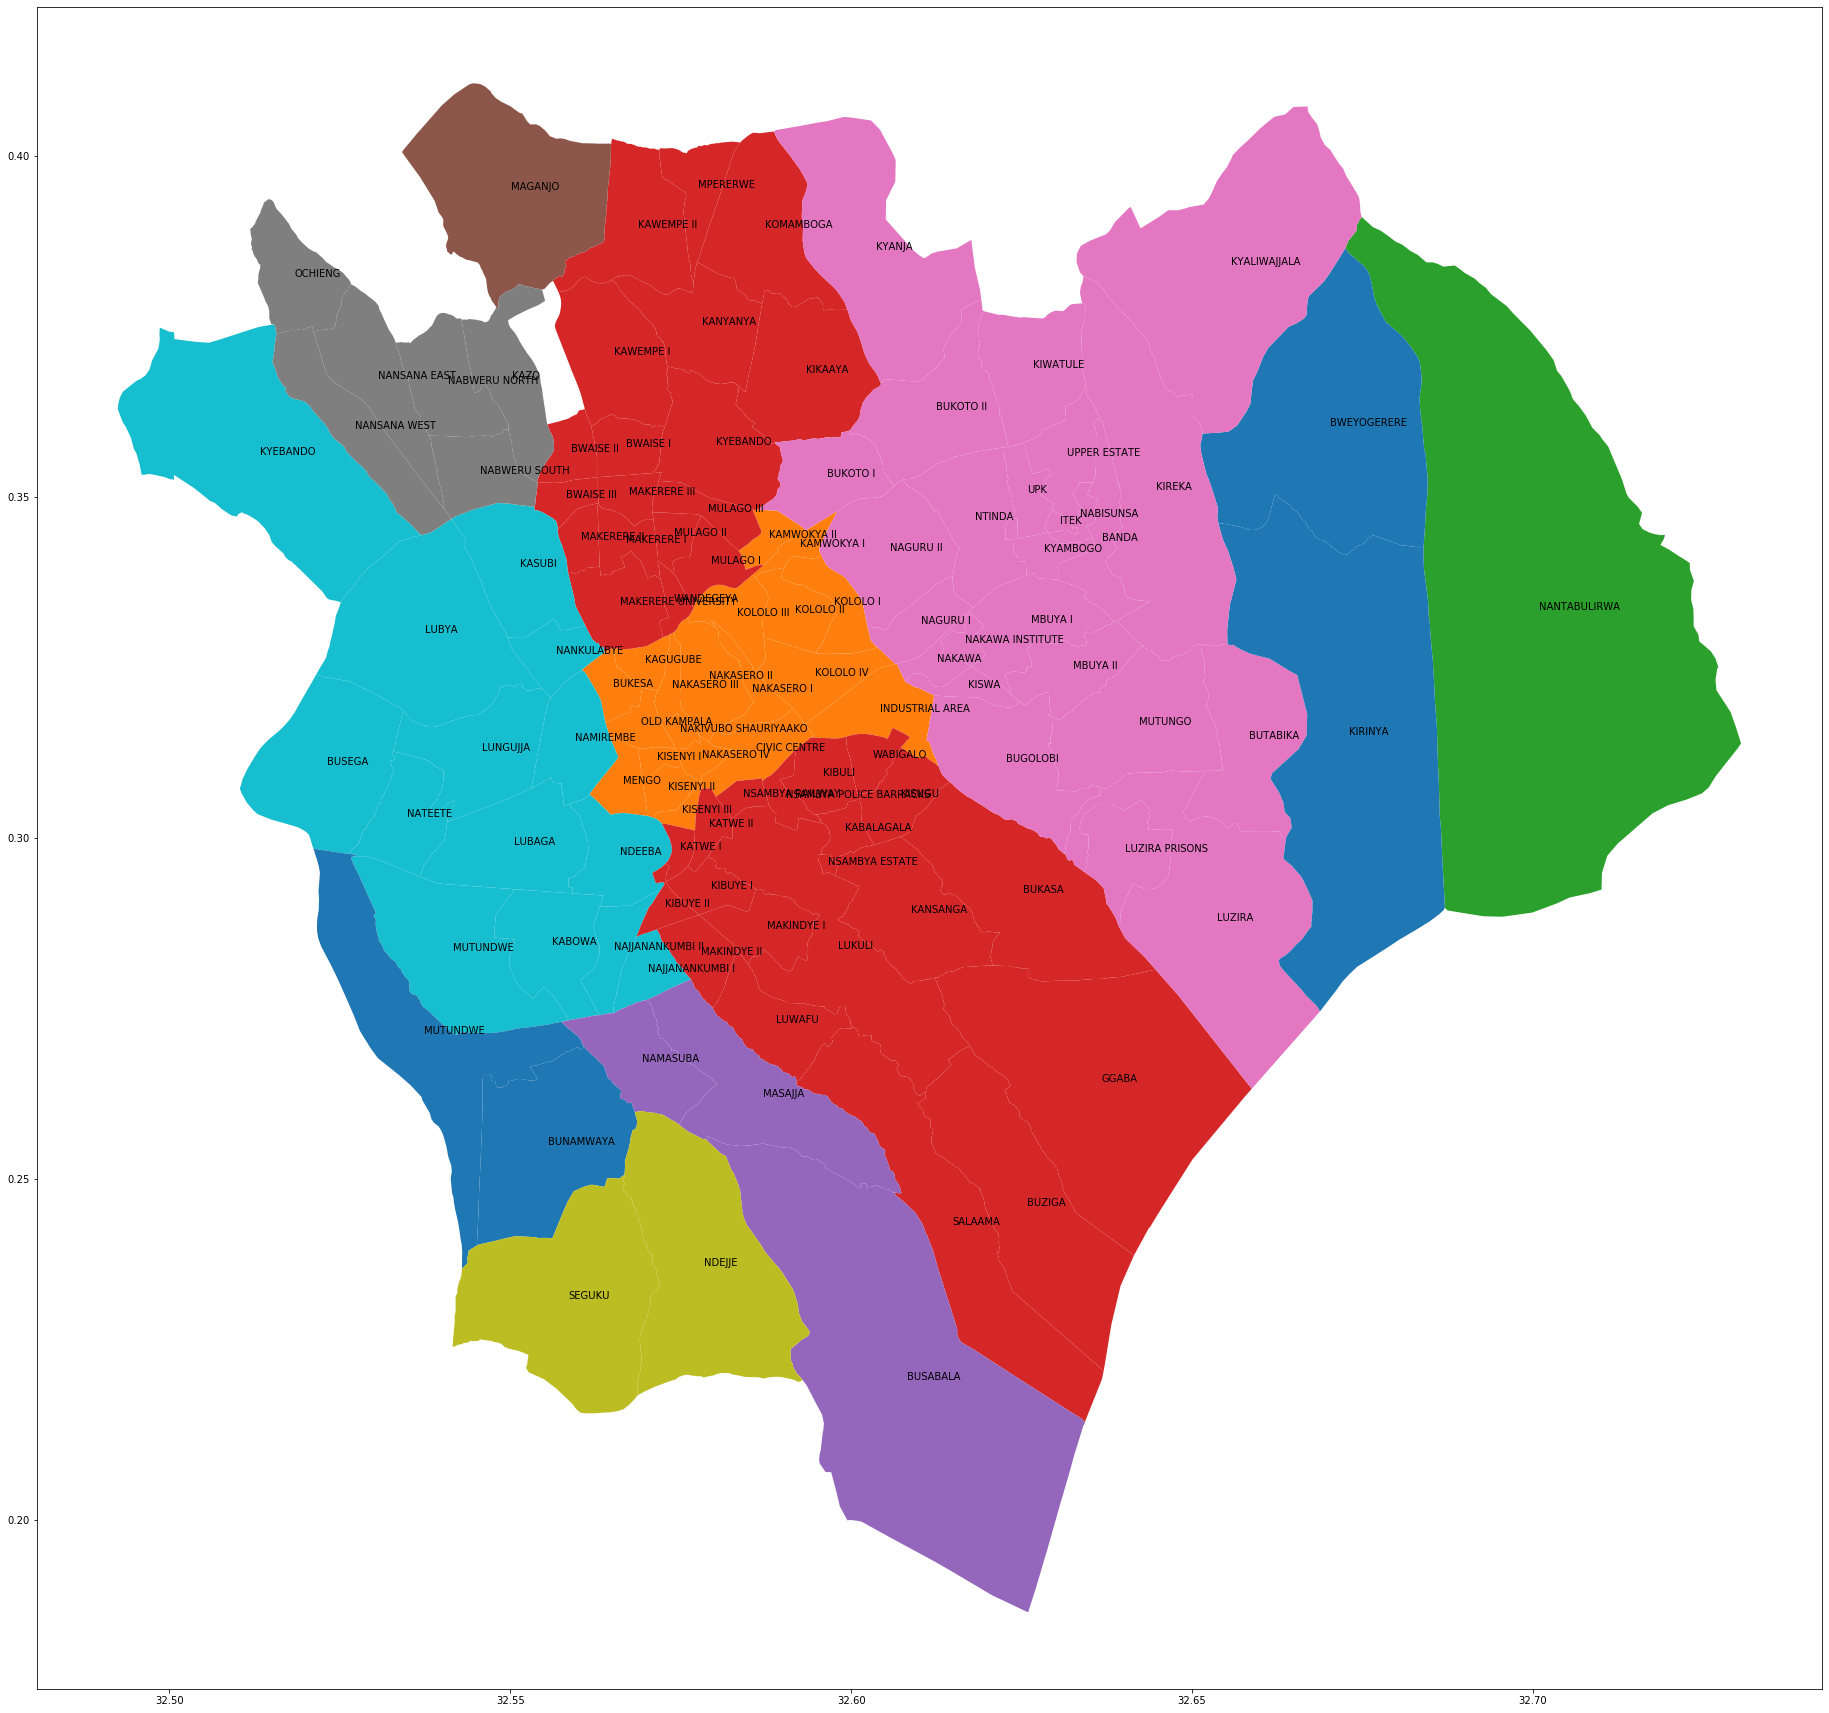

In [81]:
# Graph iwth names and sub county
fig, ax = plt.subplots(figsize=(32, 32))
ax.set_aspect('equal')
geo_kampala.plot(column='s', ax=ax, legend=False)
for i, txt in enumerate(geo_kampala.p):
    ax.annotate(txt, (geo_kampala.long[i], geo_kampala.lat[i]))
plt.show()

# Attempting a few geoplots

Text(0.5, 1, 'Number of households burning waste per km, by parish')

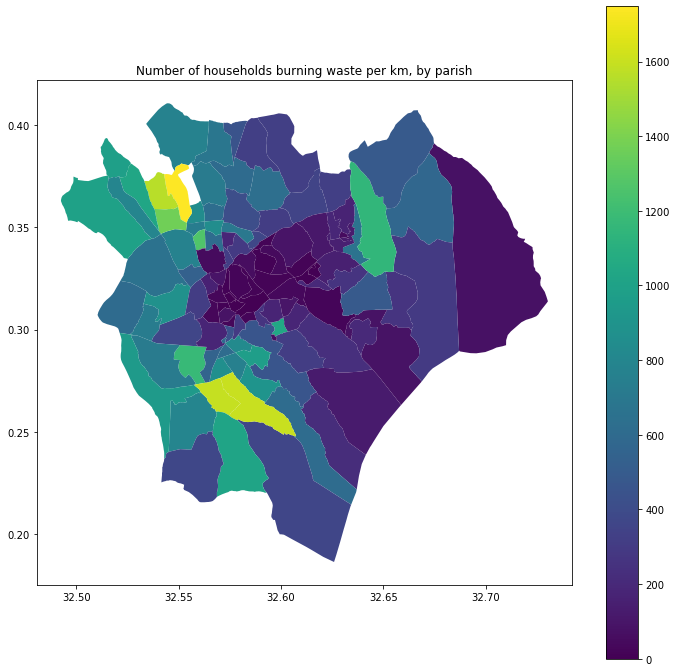

In [82]:
fig, ax = plt.subplots(figsize=(12, 12))
gk.plot(column='waste_burn_per_km', ax=ax, legend=True)
plt.title('Number of households burning waste per km, by parish')

Text(0.5, 1, 'Number of households cooking with firewood per km, by parish')

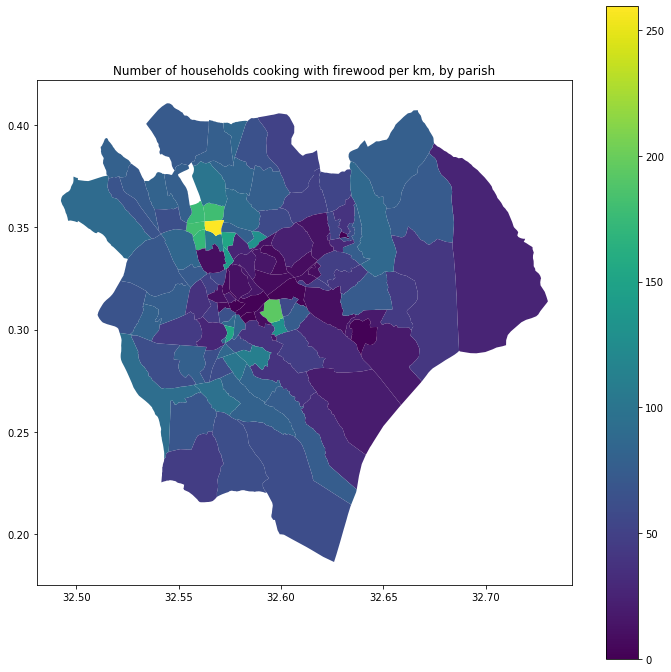

In [83]:
fig, ax = plt.subplots(figsize=(12, 12))
gk.plot(column='cook_firewood_per_km', ax=ax, legend=True)
plt.title('Number of households cooking with firewood per km, by parish')

Text(0.5, 1, 'Number of km of major roads per square km, by parish')

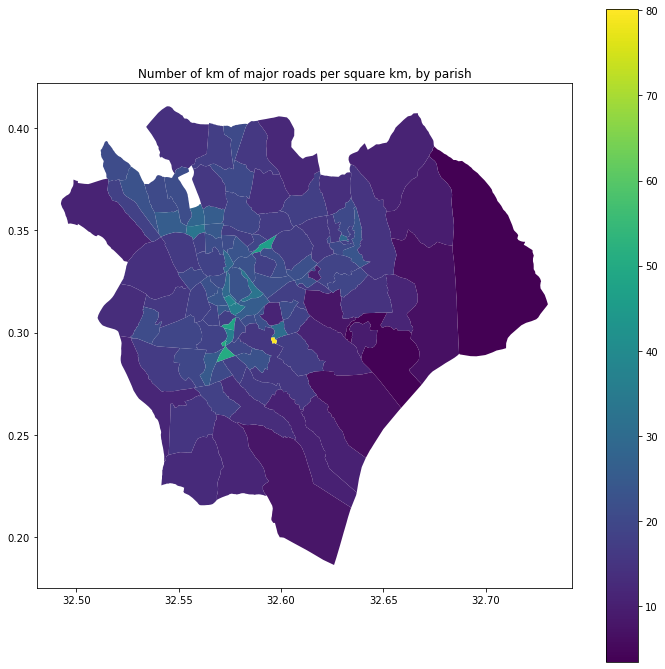

In [84]:
fig, ax = plt.subplots(figsize=(12, 12))
gk.plot(column='T123_per_sqkm', ax=ax, legend=True)
plt.title('Number of km of major roads per square km, by parish')

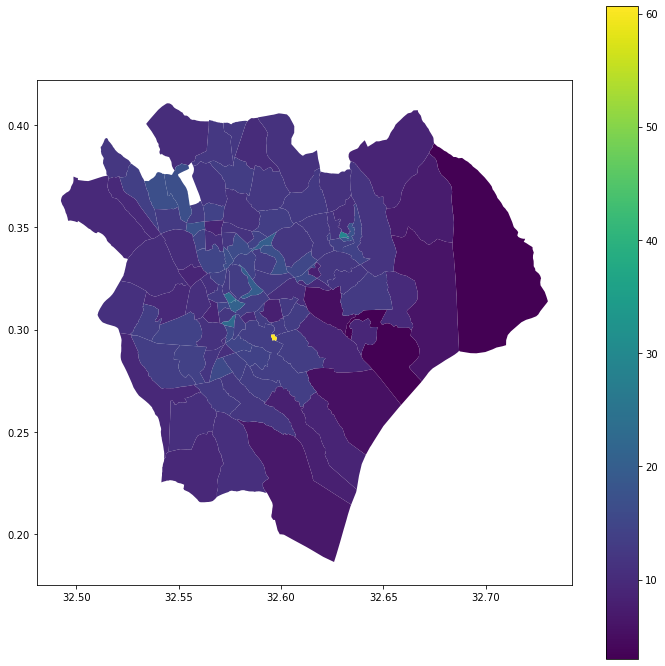

In [85]:
fig, ax = plt.subplots(figsize=(12, 12))
gk.plot(column='not_T123_per_sqkm', ax=ax, legend=True)

## Reading in business data for Kampala-Waikiso-Mukono

In [86]:
# read in population data
bus = pd.read_csv('census_of business_establishments_cobe.csv')

In [87]:
# unstacking the biness type and biness qty columns
bus = bus.pivot_table('qty', ['d', 's', 'p'], 'type').reset_index()

In [88]:
# Replaicing all NaNs with zero as no recorded value means no business
bus.fillna(0, inplace=True)

In [89]:
# creating new columns for total businesses and total polluting businesses
bus['sum_polluting'] = bus['Construction'] + bus['Food Processing'] + bus['Mining & Quarrying'] + bus['Other Manufacturing'] + bus['Transport & Storage']
bus['sum'] = bus.iloc[:, 3:-1].sum(axis=1)

In [90]:
bus

type,d,s,p,Accomodation & Food Services,Agriculture,Construction,"Education, Health & Social Work",Financial & Insurance Services,Fishing,Food Processing,...,Information & Communication,Mining & Quarrying,Other Manufacturing,Real Estate & Business Services,Recreation & Personal Services,Trade,Transport & Storage,Utilities,sum_polluting,sum
0,ABIM,ABIM T.C,ANGWEE,7.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,27.0
1,ABIM,ABIM T.C,ATUNGA,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,8.0
2,ABIM,ABIM T.C,KIRU,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,6.0
3,ABIM,ABIM T.C,OYARO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0
4,ABIM,ABIM T.C,WIA WERE,17.0,0.0,0.0,4.0,5.0,0.0,0.0,...,1.0,0.0,5.0,2.0,10.0,68.0,0.0,0.0,5.0,112.0
5,ABIM,ALEREK,OTUMPILI,3.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,22.0
6,ABIM,LOTUKEI,ACHANGALI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0
7,ABIM,LOTUKEI,ARADAI,2.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,3.0,0.0,0.0,8.0,0.0,0.0,4.0,16.0
8,ABIM,LOTUKEI,GANGMING,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,7.0
9,ABIM,LOTUKEI,ORWAMUGE,13.0,0.0,0.0,3.0,1.0,0.0,1.0,...,0.0,0.0,2.0,0.0,2.0,13.0,0.0,0.0,3.0,35.0


### Correcting for differences

In [91]:
# set(definitive_sc)

In [92]:
# bus_sc = bus.s.unique().tolist()
# bus_sc.sort()
# bus_sc

In [93]:
# # second value is the correct one, new value is the first
# differences_sc = set(definitive_sc).symmetric_difference(set(bus_sc))
# differences_sc

In [94]:
# bus.loc[bus.p == 'MUTUNDWE']

In [95]:
# # Function for changing name in shapefile to name in population data
# def name_change_sc(new,true):
#     bus.loc[bus.s == new, 's'] = true

In [96]:
# name_change_sc('NANSANA T.C','NANSANA DIVISION')
# name_change_sc('KASAWO','KASAWO SUB COUNTY')
# name_change_sc('KIMENYEDDE', 'KIMENYEDDE SUB COUNTY')
# name_change_sc('KYAMPISI','KYAMPISI SUB COUNTY')
# name_change_sc('MPATTA', 'MPATTA SUB COUNTY')
# name_change_sc('MPUNGE','MPUNGE SUB COUNTY')
# name_change_sc( 'NABBAALE', 'NABBAALE SUB COUNTY')
# name_change_sc('NAGOJJE','NAGOJJE SUB COUNTY')
# name_change_sc('NAKISUNGA','NAKISUNGA SUB COUNTY')
# name_change_sc( 'NAMA', 'NAMA SUB COUNTY')
# name_change_sc( 'NTENJERU','NTENJERU SUB COUNTY')
# name_change_sc('NTUNDA', 'NTUNDA SUB COUNTY')
# name_change_sc('SEETA NAMUGANGA', 'SEETA NAMUGANGA SUB COUNTY')

# name_change_sc( 'WAKISO TC', 'WAKISO TOWN COUNCIL')
# name_change_sc( 'WAKISO T C', 'WAKISO TOWN COUNCIL')
# name_change_sc('SEETA NAMUGANGA', 'SEETA NAMUGANGA SUB COUNTY')
# name_change_sc('NTUNDA', 'NTUNDA SUB COUNTY')
# name_change_sc('NTENJERU','NTENJERU SUB COUNTY')
# name_change_sc('NAMA', 'NAMA SUB COUNTY')
# name_change_sc('NAKISUNGA', 'NAKISUNGA SUB COUNTY')
# name_change_sc('NAGOJJE', 'NAGOJJE SUB COUNTY')
# name_change_sc( 'KASANJE','KASANJE SUB COUNTY')
# name_change_sc( 'KAKIRI','KAKIRI SUB COUNTY')
# name_change_sc('GOMA', 'GOMA DIVISION')
# name_change_sc('MENDE', 'MENDE SUB COUNTY')
# name_change_sc('NABAALE', 'NABBAALE SUB COUNTY')
# name_change_sc('NABWERU', 'NANSANA DIVISION')
# name_change_sc( 'ENTEBBE MUNICIPAL DIVISION A','DIVISION A' )
# name_change_sc('ENTEBBE MUNICIPAL DIVISION B /UNDU', 'DIVISION B')

In [97]:
### And now the same for parishes

In [98]:
# definitive_parish = popn.p.tolist()
# definitive_parish.sort()

In [99]:
# bus_parish = bus.p.tolist()
# bus_parish.sort()

In [100]:
# # second value is the correct one, new value is the first
# differences = set(definitive).symmetric_difference(set(bus_parish))
# differences

In [101]:
# # Function for changing name in shapefile to name in population data
# def name_change(new,true):
#     bus.loc[bus.p == new, 'p'] = true

In [102]:
# name_change('BAKA', 'BAKKA')
# name_change('BAKA', 'BAKKA')
# name_change('BAKA', 'BAKKA')
# name_change('BAKA', 'BAKKA')
# name_change('NAKULABYE','NANKULABYE' )
# name_change('RUBAGA', 'LUBAGA')
# # name_change('TUMBAALI', 'TTUMBALI')
# name_change('TTUMBALI', 'TUMBAALI')
# name_change('MATUGA', 'MATUGGA')
# name_change('NAMAIBA','NAMAYIBA')
# name_change('LUGUNGUDE','LUGUNGUDDE' )
# name_change('LUTISI','LUTTISI')
# name_change('MISINDYE WARD','MISINDYE' )
# name_change('MWERERWE','MWEREERWE', )
# name_change('NANSANA','NANSANA WEST')
# name_change('KYABAZALA','KYABAZAALA')
# name_change('KATETE','KATEETE')
# name_change('KYANUNA','KYANUUNA')
# name_change('GGULUDDENE', 'GULUDDENE')
# name_change('NABWERU', 'NABWERU NORTH')
# name_change('SUMBWE', 'SSUMBWE')
# name_change('SEETA-NAZIGO', 'SEETA NAZIGO')
# name_change('NAMUMIRA - ANTHONY', 'NAMUMIRA ANTHONY')
# name_change('NSUUBE - KAUGA','NSUUBE KAUGA' )
# name_change('NTAAWO WARD', 'NTAAWO')
# name_change('NYENJE WARD', 'NYENJE')
# name_change('TTIKALU', 'TIKALU')

# name_change('WAMPEWO', 'WAMPEEWO')
# name_change('WAGALA', 'WAGGALA')
# name_change('BUKEREERE WARD', 'BUKEREERE')
# name_change('BUKEREERE', 'BUKERERE')
# name_change('KIKUBAMPANGA WARD', 'KIKUBAMPANGA')
# name_change('KAKIRI WARD', 'KAKIRI')
# name_change('GGULU WARD', 'GGULU')
# name_change('BUSUJJA WARD', 'BUSUJJA')
# name_change('BBALE-MUKWENDA', 'BBALE MUKWENDA')
# name_change('BAKA', 'BAKKA')
# name_change('BUKALANGO WARD', 'BUKALANGO')

In [103]:
# bus_parish = bus.p.tolist()
# bus_parish.sort()
# # second value is the correct one, new value is the first
# differences = set(definitive).symmetric_difference(set(bus_parish))
# differences

## Combining pop/energy with business type

In [104]:
# # Merging energy and population files
# dat = pd.merge(dat, bus,  how='left', left_on=['p','s','d'], right_on = ['p','s','d'])

In [105]:
# # Great still 242 lines so these match well
# dat.shape

In [106]:
# dat